<a href="https://colab.research.google.com/github/JoonYoung-Sohn/practice/blob/master/201202_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
from lxml import etree
import urllib.request
import zipfile
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

In [2]:
urllib.request.urlretrieve("https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip", filename="ted_en-20160408.zip")

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
  target_text = etree.parse(z.open('ted_en-20160408.xml', 'r'))
  parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [3]:
parse_text[:300]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit"

In [4]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)
nltk.download('punkt')
sent_text=sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [6]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [8]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8590466976165771), ('guy', 0.8153362274169922), ('lady', 0.7662321329116821), ('boy', 0.7601685523986816), ('girl', 0.7524229288101196), ('gentleman', 0.7281246185302734), ('soldier', 0.698564350605011), ('kid', 0.6849664449691772), ('surgeon', 0.6810575723648071), ('poet', 0.6781622767448425)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") 

In [10]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8590466976165771), ('guy', 0.8153362274169922), ('lady', 0.7662321329116821), ('boy', 0.7601685523986816), ('girl', 0.7524229288101196), ('gentleman', 0.7281246185302734), ('soldier', 0.698564350605011), ('kid', 0.6849664449691772), ('surgeon', 0.6810575723648071), ('poet', 0.6781622767448425)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
!pip install konlpy
from konlpy.tag import Okt

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 460kB 44.6MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f07c2b70390>)

In [13]:
train_data = pd.read_table('ratings.txt')

In [14]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [15]:
print(len(train_data))

200000


In [16]:
print(train_data.isnull().values.any())

True


In [17]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [18]:
print(len(train_data))

199992


In [19]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [20]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [21]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [22]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


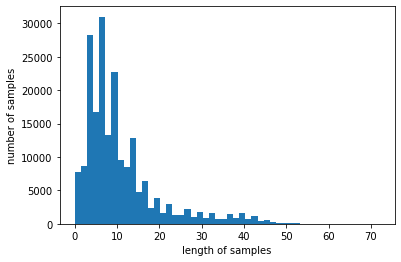

In [23]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [25]:
model.wv.vectors.shape

(16477, 100)

In [26]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8597288131713867), ('김명민', 0.8592570424079895), ('이민호', 0.8429495692253113), ('엄태웅', 0.8425920009613037), ('이주승', 0.8410662412643433), ('송강호', 0.8394181728363037), ('베일', 0.8359706997871399), ('이정재', 0.8343427181243896), ('박해일', 0.8340635299682617), ('김창완', 0.8335788249969482)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [27]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8735214471817017), ('호러', 0.8565846681594849), ('물', 0.8411487936973572), ('느와르', 0.8382996916770935), ('물의', 0.8210088610649109), ('정통', 0.8171468377113342), ('무협', 0.8170122504234314), ('첩보', 0.8016513586044312), ('홍콩', 0.8016349673271179), ('블랙', 0.7961618900299072)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [28]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [31]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [32]:
news_df.isnull().values.any()

False

In [33]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [34]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [36]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [39]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [40]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


In [41]:
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [42]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(media (702), rekhabite (63759)) -> 0
(makes (228), respectable (6623)) -> 0
(media (702), disagree (1495)) -> 1
(europeans (4520), subsidizing (15228)) -> 1
(ignore (1979), filemanager (18187)) -> 0


In [43]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [44]:
print(len(pairs))
print(len(labels))

2220
2220


In [ ]:
#skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [47]:
embed_size = 100

In [48]:
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [49]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6427700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       6427700     input_2[0][0]                    
_______________________________________________________________________________________

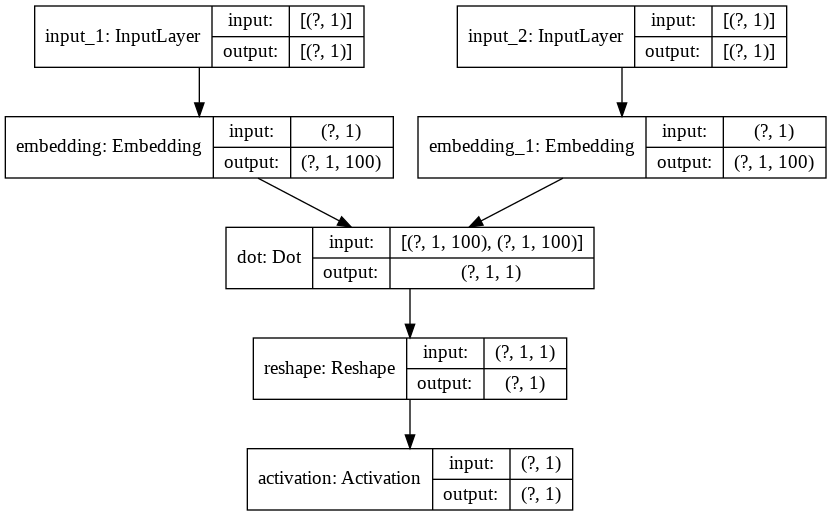

In [50]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [51]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 6.931395769119263
Epoch : 2 Loss : 6.906992733478546
Epoch : 3 Loss : 6.881575584411621
Epoch : 4 Loss : 6.8513630628585815
Epoch : 5 Loss : 6.813885450363159


In [52]:
import gensim

In [53]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [54]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [55]:
w2v.most_similar(positive=['soldiers'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('divorce', 0.3837743401527405),
 ('imagemagick', 0.3818773031234741),
 ('fnajz', 0.36695656180381775),
 ('yzpn', 0.36384251713752747),
 ('feel', 0.35717275738716125),
 ('aspirations', 0.3533039689064026),
 ('graphischer', 0.35041338205337524),
 ('afei', 0.34897860884666443),
 ('cleanse', 0.3476240634918213),
 ('phfnajz', 0.34747427701950073)]

In [56]:
w2v.most_similar(positive=['doctor'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('swapped', 0.41803446412086487),
 ('hoops', 0.4066026210784912),
 ('negligently', 0.40570616722106934),
 ('psychophysiological', 0.3828580975532532),
 ('unilateraly', 0.37990128993988037),
 ('cinnmc', 0.37372809648513794),
 ('removes', 0.36894679069519043),
 ('repeate', 0.3678109645843506),
 ('burnt', 0.3665754795074463),
 ('forechecking', 0.36572539806365967)]

In [57]:
w2v.most_similar(positive=['police'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('portray', 0.4101492464542389),
 ('compactness', 0.4013749659061432),
 ('handmaid', 0.3834760785102844),
 ('oswald', 0.3772813081741333),
 ('remotest', 0.3578660488128662),
 ('blackout', 0.35766977071762085),
 ('perception', 0.35606151819229126),
 ('undelete', 0.35246121883392334),
 ('airspace', 0.34597456455230713),
 ('megahertz', 0.3457421660423279)]

In [58]:
w2v.most_similar(positive=['knife'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ecqm', 0.39034920930862427),
 ('orteig', 0.3732978105545044),
 ('gentle', 0.37083470821380615),
 ('coats', 0.3597794771194458),
 ('bcsc', 0.35223808884620667),
 ('scar', 0.3498307168483734),
 ('fset', 0.3469979465007782),
 ('thought', 0.34491875767707825),
 ('sputnik', 0.3447427749633789),
 ('initializing', 0.34455081820487976)]

In [59]:
w2v.most_similar(positive=['engine'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('deficiencies', 0.3825177252292633),
 ('undyed', 0.37729039788246155),
 ('tranformer', 0.37364158034324646),
 ('mscs', 0.3713284134864807),
 ('witten', 0.3685373365879059),
 ('znwxb', 0.36811158061027527),
 ('reisert', 0.36808741092681885),
 ('rosary', 0.36805814504623413),
 ('ctio', 0.36647841334342957),
 ('nuptiis', 0.3656266927719116)]